In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D,Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


Using TensorFlow backend.
/home/gaurav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gaurav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gaurav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gaurav/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
df=pd.read_csv('ferdata.csv')
# df.info()
df.head()

,label,image,emotion
0,4,59 71 89 118 139 160 183 222 212 148 77 16 16 ...,Sad
1,0,144 149 129 114 119 124 125 135 145 141 147 15...,Angry
2,4,90 97 105 42 41 41 37 40 36 55 104 128 145 162...,Sad
3,1,69 72 80 87 95 102 112 123 131 137 143 151 159...,Disgust
4,0,134 135 136 137 142 122 46 47 36 25 21 18 13 1...,Angry


In [3]:
# X_train,y_train,X_test,y_test=[],[],[],[]
X=[]
y=[]

In [4]:
 for index, row in df.iterrows():
    val=row['image'].split(" ")
    try:
        X.append(np.array(val,'float32'))
        y.append(np.array(row['label']))
    except:
        print(f"error occured at index :{index} and row:{row}")

In [21]:
# X=df['image']
# y=df['label']
# sns.countplot(df.emotion)
# plt.show()


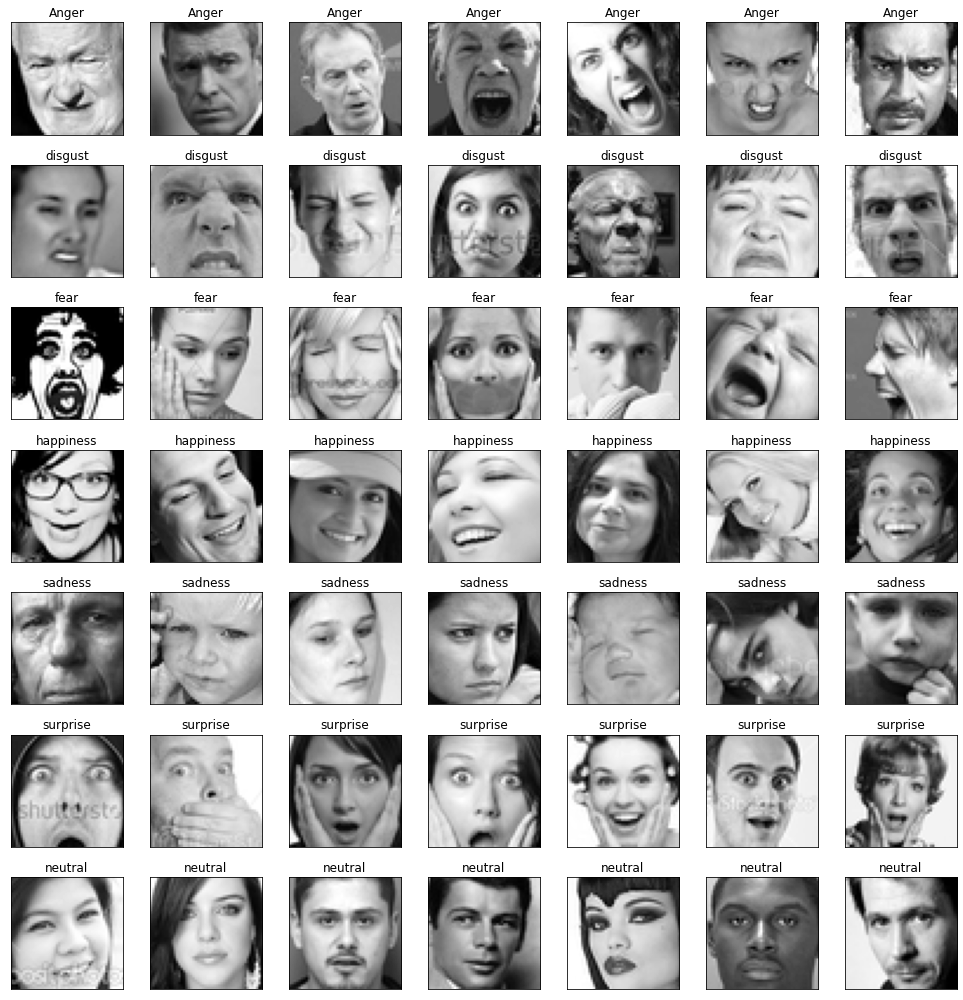

In [26]:
emotion_label_to_text = {0:'Anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.label.unique()):
    for j in range(7):
        px = df[df.label==label].image.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
# X_train

In [9]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 150
width, height = 48, 48

In [10]:
X_train = np.array(X_train,'float32')
y_train = np.array(y_train,'float32')
X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

y_train=np_utils.to_categorical(y_train, num_classes=num_labels)
y_test=np_utils.to_categorical(y_test, num_classes=num_labels)


In [11]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [12]:
#1st convolution layer
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))

model.add(Conv2D(128,kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)       

In [15]:
#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])


In [16]:
#Training the model
cnn=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,y_test),
          shuffle=True)


Train on 28705 samples, validate on 7177 samples
Epoch 1/150
28705/28705 [==============================] - 119s 4ms/step - loss: 1.9054 - accuracy: 0.2272 - val_loss: 1.8112 - val_accuracy: 0.2866
Epoch 2/150
28705/28705 [==============================] - 113s 4ms/step - loss: 1.7199 - accuracy: 0.3260 - val_loss: 1.5505 - val_accuracy: 0.4147
Epoch 3/150
28705/28705 [==============================] - 113s 4ms/step - loss: 1.5856 - accuracy: 0.3882 - val_loss: 1.4889 - val_accuracy: 0.4410
Epoch 4/150
28705/28705 [==============================] - 112s 4ms/step - loss: 1.4955 - accuracy: 0.4295 - val_loss: 1.3452 - val_accuracy: 0.4879
Epoch 5/150
28705/28705 [==============================] - 112s 4ms/step - loss: 1.4238 - accuracy: 0.4535 - val_loss: 1.2767 - val_accuracy: 0.5168
Epoch 6/150
28705/28705 [==============================] - 112s 4ms/step - loss: 1.3755 - accuracy: 0.4748 - val_loss: 1.2292 - val_accuracy: 0.5265
Epoch 7/150
28705/28705 [==============================]

28705/28705 [==============================] - 114s 4ms/step - loss: 0.8919 - accuracy: 0.6562 - val_loss: 0.8890 - val_accuracy: 0.6642
Epoch 55/150
28705/28705 [==============================] - 114s 4ms/step - loss: 0.8887 - accuracy: 0.6611 - val_loss: 0.8849 - val_accuracy: 0.6639
Epoch 56/150
28705/28705 [==============================] - 114s 4ms/step - loss: 0.8787 - accuracy: 0.6628 - val_loss: 0.8709 - val_accuracy: 0.6621
Epoch 57/150
28705/28705 [==============================] - 114s 4ms/step - loss: 0.8726 - accuracy: 0.6636 - val_loss: 0.8921 - val_accuracy: 0.6623
Epoch 58/150
28705/28705 [==============================] - 114s 4ms/step - loss: 0.8758 - accuracy: 0.6657 - val_loss: 0.8589 - val_accuracy: 0.6712
Epoch 59/150
28705/28705 [==============================] - 114s 4ms/step - loss: 0.8753 - accuracy: 0.6637 - val_loss: 0.8703 - val_accuracy: 0.6717
Epoch 60/150
28705/28705 [==============================] - 114s 4ms/step - loss: 0.8638 - accuracy: 0.6701 - val

In [17]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer4.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer4.h5")

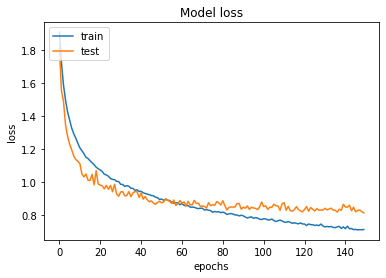

In [18]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show() 

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('fer4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./fer4.h5")
print("Loaded model from disk")

In [15]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


accuracy: 70.20%


In [16]:
lb=LabelEncoder()
preds=loaded_model.predict(X_test,batch_size=32,verbose=1)
print(preds)
pred=preds.argmax(axis=1)
pred=np_utils.to_categorical(lb.fit_transform(pred))
pred

7177/7177 [==============================] - 11s 2ms/step
[[2.7584730e-02 8.0283360e-07 2.0867202e-02 ... 8.6413778e-02
  3.8368322e-03 7.7054036e-01]
 [2.7435217e-02 1.0353453e-06 1.7341979e-01 ... 5.2677226e-01
  6.6136941e-04 2.7040038e-01]
 [7.0431888e-01 1.9638285e-04 6.4370960e-02 ... 1.6109943e-01
  4.7288788e-04 6.9279194e-02]
 ...
 [1.9934731e-05 9.9997580e-01 2.2118838e-06 ... 1.3774680e-06
  6.5178034e-07 5.3247792e-08]
 [8.3599089e-06 9.9998987e-01 1.6677394e-06 ... 6.4134397e-08
  2.4897024e-09 3.1576635e-09]
 [6.6427112e-01 6.3791680e-03 2.1483526e-01 ... 6.9689319e-02
  1.0495346e-02 9.9678533e-03]]


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.56      0.64      1011
           1       0.97      1.00      0.98      1070
           2       0.62      0.48      0.54       978
           3       0.80      0.81      0.81      1032
           4       0.46      0.52      0.49      1017
           5       0.84      0.86      0.85      1020
           6       0.53      0.66      0.59      1049

   micro avg       0.70      0.70      0.70      7177
   macro avg       0.71      0.70      0.70      7177
weighted avg       0.71      0.70      0.70      7177
 samples avg       0.70      0.70      0.70      7177



In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))
print(cm)

[[ 569   13   58   35  151   17  168]
 [   0 1070    0    0    0    0    0]
 [  66    8  467   31  199  103  104]
 [  31    0   21  841   48   20   71]
 [  64   10  102   47  524   11  259]
 [   6    4   73   31   12  873   21]
 [  38    3   36   60  201   17  694]]


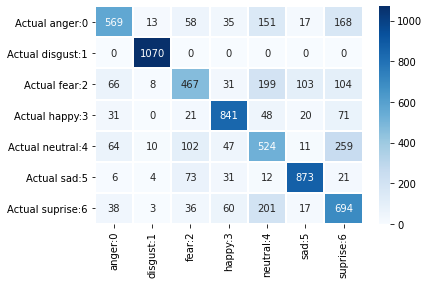

In [19]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['anger:0', 'disgust:1','fear:2','happy:3','neutral:4','sad:5','suprise:6'], 
                                 index=['Actual anger:0', 'Actual disgust:1','Actual fear:2','Actual happy:3','Actual neutral:4','Actual sad:5','Actual suprise:6'])
sns.heatmap(cm_matrix, annot=True,fmt='d', cmap='Blues',linewidths=1)
